In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB

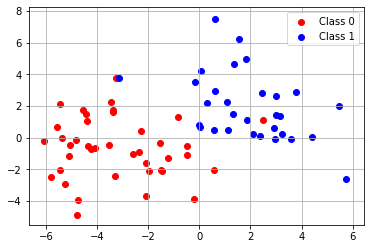

In [22]:
# licznosci klas
n0 = 40
n1 = 30

# macierz kowariancji
cov = np.array([[4,0],[0,4]])

# generowanie punktów klasy 1 z rozkładu Gaussa o zadanej średniej
mean_0 = np.array([-3,-1])
C0 = np.random.multivariate_normal(mean_0, cov, n0)
y0 = np.zeros(n0)

# generowanie punktów klasy 2 z rozkładu Gaussa o zadanej średniej
mean_1 = np.array([2,2])
C1 = np.random.multivariate_normal(mean_1, cov, n1)
y1 = np.ones(n1)

C = np.r_[C0,C1]
y = np.hstack((y0,y1))

# rysowanie wykresu z 2 klasami i legenda 
fig, ax = plt.subplots()
ax.scatter(C0[:,0],C0[:,1],color = "red", label="Class 0")
ax.scatter(C1[:,0],C1[:,1],color = "blue", label="Class 1")


# granice osi X i Y
lim = plt.axis()
plt.grid()
plt.legend()
plt.show()

In [23]:
# wyliczanie wartości z wygenerowanych punktów
mean0 = np.mean(C0,axis=0)
cov0 = np.cov(C0.T)
var0 = np.var(C0,axis=0)
pi0 = n0/(n1+n0)

mean1 = np.mean(C1,axis=0)
cov1 = np.cov(C1.T)
var1 = np.var(C1,axis=0)
pi1 = n1/(n1+n0)

var_x = [var0[0],var1[0]]
var_y = [var0[1],var1[1]]

mean_x = [mean0[0],mean1[0]]
mean_y = [mean0[1],mean1[1]]
pi = [pi0,pi1]

In [24]:
def NaiveBayes(data):
    pdfx, pdfy = [0,0], [0,0]
    proba = np.zeros((2,len(data)))
    for k in range(2):
        pdfx[k] = (1 / np.sqrt(2 * np.pi * var_x[k])) * np.exp(-(data[:,0]-mean_x[k])**2/(2*var_x[k]))
        pdfy[k] = (1 / np.sqrt(2 * np.pi * var_y[k])) * np.exp(-(data[:,1]-mean_y[k])**2/(2*var_y[k]))
        proba[k] = pi[k] * pdfx[k] * pdfy[k]
    return np.array([np.argmax([proba[0,n],proba[1,n]]) for n in range(len(data))])

In [25]:
# I - naiwny klasyfikator Bayesa z bibiloteki scikit-learn

model = GaussianNB()
model.fit(C,y)

# rozpięcie siatki na współrzędnych
xx, yy = np.meshgrid(np.linspace(lim[0], lim[1],150),np.linspace(lim[2], lim[3],150))

# przewidywanie prawdopodobieństw
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape) 


# przewidywanie prawdopodobieństw za pomoca funckji NaiveBayes()
Ct = np.c_[xx.ravel(),yy.ravel()]
yt = NaiveBayes(Ct)
yt = yt.reshape(xx.shape)


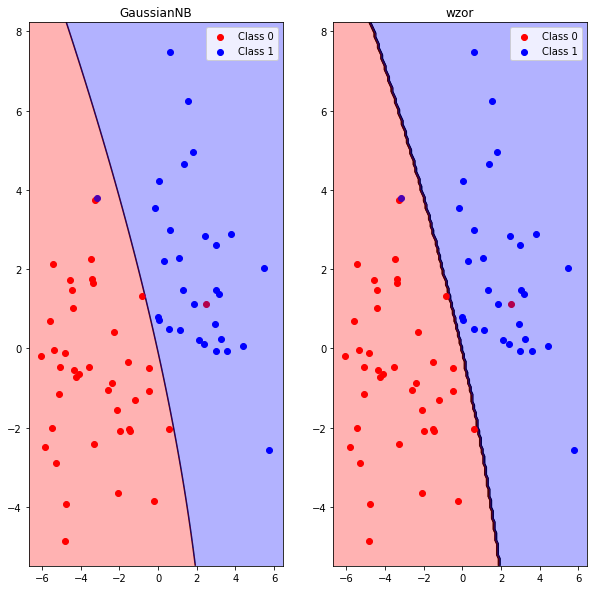

In [60]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
# rozdzielenie z GaussianNB
ax[0].scatter(C0[:,0], C0[:,1], color = "red", label="Class 0")
ax[0].scatter(C1[:,0], C1[:,1], color = "blue", label="Class 1")
ax[0].contourf(xx, yy, Z, 1, alpha=0.3, colors=("red","blue"))
ax[0].contour(xx, yy, Z, 1, alpha=1, colors="black",zorder=0)
ax[0].set_title("GaussianNB")
ax[0].legend()

# rozdzielenie ze wzoru
ax[1].scatter(C0[:,0], C0[:,1], color = "red", label="Class 0")
ax[1].scatter(C1[:,0], C1[:,1], color = "blue", label="Class 1")
ax[1].contourf(xx, yy, yt, 1, alpha=0.3, colors=("red","blue"))
ax[1].contour(xx, yy, yt, colors="black",zorder=0)
ax[1].set_title("wzor")
ax[1].legend()

plt.show()

### Powyższy wykres pokazuje, że korzystając z definicji naiwnego klasyfikatora Bayesa otrzymaliśmy taki sam rezultat co w przypadku gotowej funkcji GaussianNB()